In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

fpath = "../images/sunsets/resized/sunset ("
imArr=[]
grArr=[]
for i in range(13):
    num = str(i+1)
    filepath = fpath + num + ").jpg"
    image = cv2.imread(filepath)
    imArr.append(image)
    grArr.append(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
    #to use the SIFT features we need a greyscale image

# we can dispaly it with matplotlib

def show_colour_and_grey_image(img_index):
    colour_img = cv2.cvtColor(imArr[img_index], cv2.COLOR_BGR2RGB)
    grey_img = grArr[img_index]
    fig = plt.figure()
    ax0 = fig.add_subplot(121)
    ax0.axis("off")
    ax0.imshow(colour_img)
    ax1 = fig.add_subplot(122)
    ax1.axis("off")
    ax1.imshow(grey_img, cmap='gray')
    plt.show()

# show_colour_and_grey_image(1)
# show_colour_and_grey_image(8)

def gen_sift_features(gray_img):
    sift = cv2.xfeatures2d.SIFT_create()
    # kp is the keypoints
    #
    # desc is the SIFT descriptors, they're 128-dimensional vectors
    # that we can use for our final features
    kp, desc = sift.detectAndCompute(gray_img, None)
    return kp, desc

def show_sift_features(gray_img, color_img, kp):
    plt.figure()
    plt.axis("off")
    plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))
    plt.show()

# first_image = imArr[0]
# first_image_grey = grArr[0]
# first_image_kp, first_image_desc = gen_sift_features(first_image_grey)
#
# print ('Here are what our SIFT features look like for the front-view octopus image:')
# show_sift_features(first_image_grey, first_image, first_image_kp)

# sunset_1 = imArr[1]
# sunset_1_grey = grArr[1]
# sunset_1_kp, sunset_1_desc = gen_sift_features(sunset_1_grey)

# sunset_1_data = [sunset_1, sunset_1_grey, sunset_1_kp, sunset_1_desc]

# show_sift_features(sunset_1_data[1], sunset_1_data[0], sunset_1_data[2])

# sunset_2 = imArr[8]
# sunset_2_grey = grArr[8]
# sunset_2_kp, sunset_2_desc = gen_sift_features(sunset_2_grey)

# sunset_2_data = [sunset_2, sunset_2_grey, sunset_2_kp, sunset_2_desc]

# show_sift_features(sunset_2_data[1], sunset_2_data[0], sunset_2_data[2])

sunset_data = []
for i in range(13):
    sunset_kp, sunset_desc = gen_sift_features(grArr[i])
    sunset_data_object = [imArr[i], grArr[i], sunset_kp, sunset_desc]
    sunset_data.append(sunset_data_object)

# for j in range(13):
#     show_sift_features(sunset_data[j][1], sunset_data[j][0], sunset_data[j][2])
    
def show_matching_features(img1_data, img2_data):
    # create a BFMatcher object which will match up the SIFT features
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

    matches = bf.match(img1_data[3], img2_data[3])

    # Sort the matches in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)

    # draw the top N matches
    N_MATCHES = 100

    match_img = cv2.drawMatches(
        img1_data[0], img1_data[2],
        img2_data[0], img2_data[2],
        matches[:N_MATCHES], img2_data[0].copy(), flags=0)

    plt.figure(figsize=(12,6))
    plt.imshow(match_img);
    plt.show()
    
# show_matching_features(sunset_1_data, sunset_2_data)


print(len(sunset_data[7][3]))

75


In [6]:
import numpy as np
spath = "./sunset_vectors/sunset_data_"
for k in range(13):
    sunset_data_object = sunset_data[k]
    sunset_data_object_desc = sunset_data_object[3]
    filepath = spath + str(k+1)
    np.save(filepath, sunset_data_object_desc)

In [13]:
print(sunset_1_data[3][0])
print()


print len(sunset_1_data[2]), 'keypoints in the list'
print sunset_1_data[2][0]

def explain_keypoint(kp):
    print 'angle\n', kp.angle
    print '\nclass_id\n', kp.class_id
    print '\noctave (image scale where feature is strongest)\n', kp.octave
    print '\npt (x,y)\n', kp.pt
    print '\nresponse\n', kp.response
    print '\nsize\n', kp.size

print 'this is an example of a single SIFT keypoint:\n* * *'
explain_keypoint(sunset_1_data[2][0])

NameError: name 'sunset_1_data' is not defined

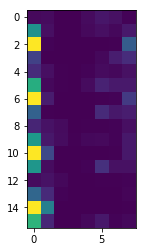

In [11]:
plt.imshow(sunset_1_data[3][0].reshape(16,8), interpolation='none');

In [7]:
def readImagesCreateSIFT(num, readpath, savepath):
    img_data_array = []
    for i in range(num):
        if(num > 1):
            readpath = readpath + str(i+1) + ").jpg"
            savepath = savepath + str(i+1)
        image = cv2.imread(readpath)
        grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        kp, desc = gen_sift_features(grey)
        if(num == 1):
            img_data_array = [image, grey, kp, desc]
        else:
            img_data_array.append([image, grey, kp, desc])
        np.save(savepath, desc)
    return img_data_array
        
rotated_sunset_data = readImagesCreateSIFT(1, "../images/sunsets/resized/sunset (3) - upside.jpg", "./vectors/sunset_rot_180")
original_sunset_data = readImagesCreateSIFT(1, "../images/sunsets/resized/sunset (3).jpg", "./vectors/sunset_orig")

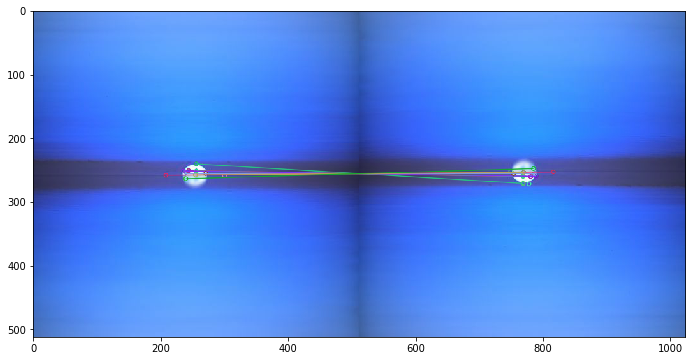

[[  0.   0.   0. ...,   0.   0.   1.]
 [ 67.   0.   0. ...,  26.   0.   0.]
 [ 63.  25.   0. ...,   0.   0.   5.]
 ..., 
 [  5.  31.  62. ...,  29.  80.   0.]
 [  2.  37.  84. ...,  38.  66.   0.]
 [  0.   0.   0. ...,   0.   0.   0.]]
[[  0.   0.   0. ...,   0.   0.   1.]
 [ 27.   0.   0. ...,  22.   0.   1.]
 [ 61.  27.   0. ...,   0.   0.   1.]
 ..., 
 [  0.   0.   0. ...,   0.   0.   0.]
 [  0.   0.   3. ...,   0.   0.   0.]
 [  4.  70.  26. ...,  30.  25.   3.]]


In [9]:
show_matching_features(original_sunset_data, rotated_sunset_data)
print(rotated_sunset_data[3])
print(original_sunset_data[3])